In [79]:
import heapq
import math
import matplotlib.pyplot as plt

In [80]:
class Huffman:
    class Node:
        def __init__(self, value, symbol, children=None):
            self.value = value
            self.symbol = symbol
            self.children = children
            self.huff = ''

        def __lt__(self, nxt):
            return self.value < nxt.value

    def __init__(self):
        self.huffman = {}

    def printNodes(self, node, val=''):
        newVal = val + str(node.huff)

        if node.children:
            for i, child in enumerate(node.children):
                child.huff = i
                self.printNodes(child, newVal)
        else:
            print(f"{node.symbol} -> {newVal}")
            self.huffman[node.symbol] = newVal

    def buildHuffmanTree(self, symbols, values, base):
        nodes = []
        for x in range(len(symbols)):
            heapq.heappush(nodes, self.Node(values[x], symbols[x]))

        while len(nodes) > 1:
            children = [heapq.heappop(nodes) for _ in range(min(base, len(nodes)))]
            newNode = self.Node(sum(child.value for child in children), ''.join(child.symbol for child in children), children)
            heapq.heappush(nodes, newNode)

        return nodes[0]

    def calculate_entropy(self, probabilities, base):
        entropy = -sum(p * math.log(p, base) for p in probabilities if p > 0)
        return entropy

    def calculate_average_code_length(self, symbols, probabilities):
        pro_sym = {symbol: probability for symbol,probability in zip(symbols,probabilities)}
        total_length = [len(self.huffman[symbol]) * pro_sym[symbol] for symbol in symbols]

        return sum(total_length)

    def calculate_efficiency(self, entropy, average_code_length):
        efficiency = entropy / average_code_length
        return efficiency



In [81]:
huffman = Huffman()
base = 2

# Symbols
symbols = ['a', 'b', 'c', 'e','d','f','g','h']
values = [0.343, 0.147, 0.147, 0.147, 0.063, 0.063, 0.063, 0.027] # probabilities

# symbols = ['a','b']
# values = [0.7,0.3]
e= []

## First Order 

In [82]:
root = huffman.buildHuffmanTree(symbols, values, base)

# Printing the result Huffman Code
huffman.printNodes(root)

# Calculate entropy
entropy = huffman.calculate_entropy(values, base)
print(f"Entropy: {entropy:.4f}")

# Calculate average code word length
average_code_length = huffman.calculate_average_code_length(symbols, values)
print(f"Average Code Word Length: {average_code_length:.4f}")

# Calculate efficiency
efficiency = huffman.calculate_efficiency(entropy, average_code_length)
print(f"Efficiency: {efficiency:.4f}")

e.append(efficiency)

c -> 00
h -> 0100
f -> 0101
g -> 0110
d -> 0111
e -> 100
b -> 101
a -> 11
Entropy: 2.6439
Average Code Word Length: 2.7260
Efficiency: 0.9699


## Second Order

In [83]:
sec_symbols = []
sec_values = []
for i in range(len(symbols)):
    for j in range(len(symbols)):
        sec_symbols.append(symbols[i]+ symbols[j])
        sec_values.append(values[i]*values[j])

huffman2 = Huffman()



In [84]:
root = huffman2.buildHuffmanTree(sec_symbols, sec_values, base)

# Printing the result Huffman Code
huffman2.printNodes(root)

# Calculate entropy
entropy = huffman2.calculate_entropy(sec_values, base)
print(f"Entropy: {entropy:.4f}")

# Calculate average code word length
average_code_length = huffman2.calculate_average_code_length(sec_symbols, sec_values)
print(f"Average Code Word Length: {average_code_length:.4f}")

# Calculate efficiency
efficiency = huffman2.calculate_efficiency(entropy, average_code_length)
print(f"Efficiency: {efficiency:.4f}")

e.append(efficiency)

ad -> 00000
ga -> 00001
ac -> 0001
ba -> 0010
ab -> 0011
ae -> 0100
ca -> 0101
ea -> 0110
db -> 011100
gh -> 011101000
hd -> 011101001
hf -> 011101010
hg -> 011101011
he -> 01110110
hb -> 01110111
hc -> 01111000
ch -> 01111001
eh -> 01111010
bh -> 01111011
df -> 01111100
dg -> 01111101
gd -> 01111110
gf -> 01111111
aa -> 100
gg -> 10100000
fd -> 10100001
ff -> 10100010
fg -> 10100011
dd -> 10100100
dh -> 101001010
hh -> 1010010110
fh -> 1010010111
bg -> 1010011
ah -> 1010100
ha -> 1010101
bf -> 1010110
ge -> 1010111
ef -> 1011000
eg -> 1011001
bd -> 1011010
cg -> 1011011
gc -> 1011100
gb -> 1011101
ed -> 1011110
cf -> 1011111
fe -> 1100000
fc -> 1100001
cd -> 1100010
fb -> 1100011
de -> 1100100
dc -> 1100101
ee -> 110011
eb -> 110100
bc -> 110101
ce -> 110110
bb -> 110111
ec -> 111000
be -> 111001
cb -> 111010
cc -> 111011
af -> 111100
ag -> 111101
fa -> 111110
da -> 111111
Entropy: 5.2877
Average Code Word Length: 5.3290
Efficiency: 0.9922


## Third Order

In [85]:
thir_symbols = []
thir_values = []
for i in range(len(symbols)):
    for j in range(len(symbols)):
        for k in range(len(symbols)):
            thir_symbols.append(symbols[i]+ symbols[j]+ symbols[k])
            thir_values.append(values[i]*values[j]*values[k])

huffman3 = Huffman()



In [86]:
root = huffman3.buildHuffmanTree(thir_symbols, thir_values, base)

# Printing the result Huffman Code
huffman3.printNodes(root)

# Calculate entropy
entropy = huffman3.calculate_entropy(thir_values, base)
print(f"Entropy: {entropy:.4f}")

# Calculate average code word length
average_code_length = huffman3.calculate_average_code_length(thir_symbols, thir_values)
print(f"Average Code Word Length: {average_code_length:.4f}")

# Calculate efficiency
efficiency = huffman3.calculate_efficiency(entropy, average_code_length)
print(f"Efficiency: {efficiency:.4f}")

e.append(efficiency)

fga -> 000000000
gad -> 000000001
adg -> 000000010
dfa -> 000000011
dda -> 000000100
dga -> 000000101
adf -> 000000110
agf -> 000000111
add -> 000001000
dhh -> 00000100100000
fhh -> 00000100100001
ghh -> 00000100100010
hdh -> 00000100100011
hfh -> 00000100100100
hgh -> 00000100100101
hhe -> 0000010010011
hhb -> 0000010010100
hhc -> 0000010010101
heh -> 0000010010110
hbh -> 0000010010111
hch -> 0000010011000
chh -> 0000010011001
ehh -> 0000010011010
bhh -> 0000010011011
gfh -> 0000010011100
ggh -> 0000010011101
ghd -> 0000010011110
ghf -> 0000010011111
ebb -> 00000101
cbc -> 00000110
cbe -> 00000111
bbe -> 00001000
cec -> 00001001
beb -> 00001010
eec -> 00001011
ebe -> 00001100
eee -> 00001101
cce -> 00001110
ecc -> 00001111
bcb -> 00010000
ccb -> 00010001
cee -> 00010010
eeb -> 00010011
cbb -> 00010100
ebc -> 00010101
ceb -> 00010110
ccc -> 00010111
bec -> 00011000
bcc -> 00011001
bbc -> 00011010
bee -> 00011011
ece -> 00011100
ecb -> 00011101
bce -> 00011110
bbb -> 00011111
afb -> 001

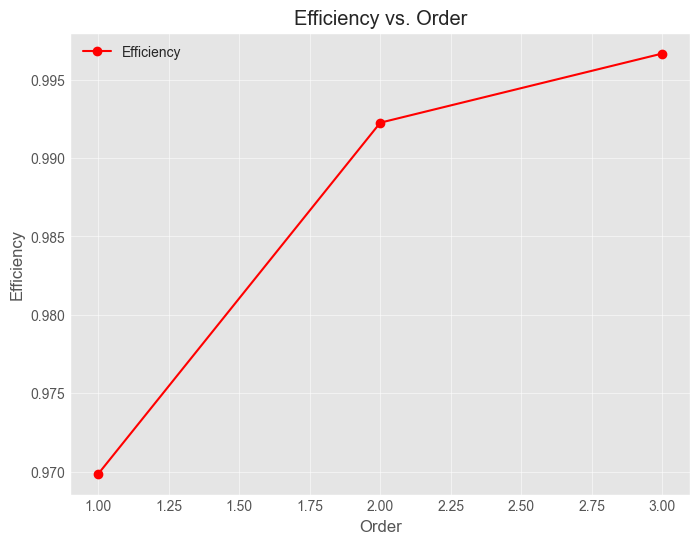

In [93]:
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')

# Plot the data with labels and a title
plt.plot(range(1,len(e)+1), e, marker='o', linestyle='-', color='r', label='Efficiency')
plt.xlabel('Order')
plt.ylabel('Efficiency')
plt.title('Efficiency vs. Order')
plt.legend()

plt.grid(True, alpha=0.5)

plt.show()